
### sklearn is simple and efficient tool for data mining and data analysis
### its build on numpy, Scipy and matplotlib

what we can achieve for sklearn

1. Regression Model (stock price prediction)
2. Classification Model (spam detection)
3. Clustering
4. Model selection
5. Dimensionality reduction
6. preprosseing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline

In [2]:
wine= pd.read_csv('/home/sachin/Downloads/Datasets/winequality-red.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(wine.shape)
print(wine.info())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# preprocessing of data
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_names)
wine.head()
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality=LabelEncoder()
wine['quality']=label_quality.fit_transform(wine['quality'])
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

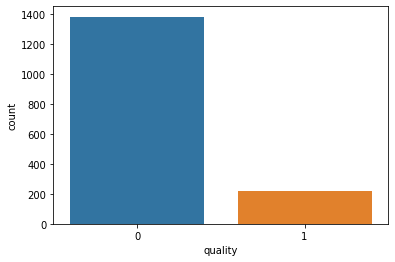

In [12]:
sns.countplot(wine['quality'])

In [13]:
X=wine.drop('quality',axis=1)

In [14]:
y=wine['quality']

In [17]:
# spliting in train and test

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [34]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train[:10]

array([[-0.01682248, -1.50121899,  0.762896  , -0.37269709, -0.17571497,
        -0.46040484, -0.58915144,  0.33680149, -0.62102774,  0.83599012,
        -0.94030402],
       [ 0.32651723,  1.18720186, -0.46735646, -0.03655748, -0.23872603,
        -0.07775011,  0.04350563,  0.33151325, -0.68514062, -1.09900494,
        -0.65820178],
       [-0.30293891,  0.32801582,  0.30155133, -0.37269709, -0.30173709,
         0.78322301,  2.21261558,  0.01950735, -0.36457622, -0.68855144,
        -0.94030402],
       [-0.81794847,  1.29806458, -1.28752477, -0.17101333, -0.53277764,
         1.8355235 ,  0.49540353,  0.38968385,  1.68703597,  0.71871769,
        -0.47013363],
       [ 0.66985694,  1.38121161, -0.26231439, -0.43992502, -0.23872603,
        -0.93872324, -0.43851881,  1.07715449, -0.30046334, -0.57127902,
         0.18810492],
       [-0.7035019 , -0.39259183, -0.67239854,  0.16512629, -0.25972972,
        -0.07775011, -0.28788617, -0.27663385,  0.34066547, -0.98173251,
         0.282

## RandomForestClassifier

In [35]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [36]:
pred_rfc[:20]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# lets see how model is preforming
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       285
           1       0.64      0.51      0.57        35

    accuracy                           0.92       320
   macro avg       0.79      0.74      0.76       320
weighted avg       0.91      0.92      0.91       320

[[275  10]
 [ 17  18]]


## SVM classifier

In [38]:
sv=SVC()
sv.fit(X_train,y_train)
pred_sv=sv.predict(X_test)

In [39]:
# lets see how model is preforming
print(classification_report(y_test,pred_sv))
print(confusion_matrix(y_test,pred_sv))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       285
           1       0.55      0.31      0.40        35

    accuracy                           0.90       320
   macro avg       0.74      0.64      0.67       320
weighted avg       0.88      0.90      0.88       320

[[276   9]
 [ 24  11]]


### Neural network

In [40]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

/home/sachin/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       285
           1       0.36      0.46      0.41        35

    accuracy                           0.85       320
   macro avg       0.65      0.68      0.66       320
weighted avg       0.87      0.85      0.86       320

[[257  28]
 [ 19  16]]


In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_rfc))

0.915625


In [43]:
# for further see sklearn framework web page